In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import copy
import os
import random
import math as math
import matplotlib.pylab as plt #Typically matplotlib.pylab is imported as plt (shortened name)
import pdb
from scipy.optimize import minimize
import shutil
import csv
from MyLatexFunctions_SocialLearning import * 
from itertools import permutations 
from itertools import combinations
import csv


import networkx as nx

This file is used to compute the QRE in network (a). 

In [3]:
outputfolder = "C:\\Users\\xinxi\\Anaconda3\\Xinxin's Files\\Networks\\4O3I_Distance\\"

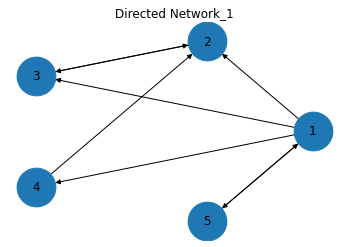

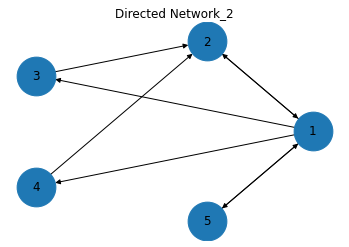

In [4]:
network = ["c1","c2"]
Alldata =  pd.DataFrame()
for i in range(1,3):
    data = pd.read_csv(outputfolder+"network_c"+str(i)+".csv", sep=",", header=0)
    #data.columns = [ "from", "to" ]
    data["network"] = i
    Alldata = Alldata.append(data)

    
for i in range(1,3):
    # Build your graph. Note that we use the DiGraph function to create the graph!
    G=nx.from_pandas_edgelist(Alldata[Alldata.network==i], 'from', 'to', create_using=nx.DiGraph() )

    # Make the graph
    f1 = plt.figure()
    plt.title("Directed Network_"+str(i))
    nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=1500, alpha=1, arrows=True) 
    plt.show()

# Part 1: Preliminaries

In [4]:
# CRRA utility function
def CRRA(x,gamma): #can use offset by xMin in case of negative values of x
    if gamma == 1:
        return np.log(x)
    else:
        return ((x)**(1-gamma) - 1)/(1-gamma)

In [5]:
# Define the payoff, assuming that the utility depends solely on the payoff
# Estimate the prob of decising at turn 0, each subject has 10 strategies, at each node (A->E), 
#  wait or decide at turn 0
# Calculate expected utility of action a given other players' mixing prob. (Turocy,for network)
# Notice that I am only calculating B's 3 strategies, decide at turn 0, 1, 2
def payoff(pOther, cost):
    '''This is for network (a)'''
    diff_pay = 100
    q = 0.7
    if cost=='h':
        c = 8
    elif cost == 'l':
        c = 1
    # We know there are 5 nodes, pay matrix is 5X2
    pay =  np.empty((5,2),dtype=float)
    pay[:,0] = ProbCorrect_Bayesian(1,q)*diff_pay

    
    # indegree = 1, node A or E, (position 0, 4)
    pay_1 = ProbCorrect_Bayesian(2,q)*diff_pay - c
    pay[0,1] = pay_1 
    pay[4,1] = pay_1 
    # indegree = 1, node D, (position 3)
    pay_2 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (1- pOther[0])*ProbCorrect_Bayesian(3,q)*diff_pay - 2*c
    pay[3,1] = max(pay_1, pay_2)
    # indegree = 3, node B
    pay_1 = ProbCorrect_Bayesian(4,q)*diff_pay - c
    pay_2 = pOther[0]*ProbCorrect_Bayesian(4,q)*diff_pay + (1- pOther[0])*ProbCorrect_Bayesian(5,q)*diff_pay - 2*c
    pay[1,1] = max(pay_1, pay_2)
    # indegree = 2, node C
    pay_1 = ProbCorrect_Bayesian(3,q)*diff_pay - c
    pay_2 = pOther[0]*pOther[1]*ProbCorrect_Bayesian(3,q)*diff_pay 
    + (pOther[1]*(1- pOther[0])+pOther[0]*(1- pOther[1]))*ProbCorrect_Bayesian(4,q)*diff_pay + (1-pOther[0])*(1-pOther[1])*ProbCorrect_Bayesian(3,q)*diff_pay - 2*c
    pay[2,1] = max(pay_1, pay_2)

    return pay
    
    


In [6]:
payoff([0,1,1,1,1], 'h')

array([[70. , 62. ],
       [70. , 70.4],
       [70. , 70.4],
       [70. , 62.4],
       [70. , 62. ]])

In [7]:
# Calculate expected utility of action a given other players' mixing prob.(PolicyIteration， old)
# Notice that I'm assuming each one has two actions available. 
def Utility(pOther,cost,gamma):
    n=len(pOther)
    pH=pOther[1]**n #Probability that all other play H
    u1 = pH*CRRA(1+min(1, 1) - cost*1,gamma) + \
        (1-pH)* CRRA(1+min(1, 0) - cost*1,gamma) #Add
    u0 = pH*CRRA(1+min(0, 1) - cost*0,gamma) + \
        (1-pH)* CRRA(1+min(0, 0) - cost*0,gamma) #Add  
    return np.array([u0, u1])

In [8]:
# Calculate expected utility of action a given other players' mixing prob. (Turocy,old)
# Notice that I'm assuming each one has two actions available. 
def Utility(sij, pOther,cost,gamma):
    n=len(pOther)
    pH=pOther[1]**n #Probability that all other play H
    u = pH*CRRA(1+min(sij, 1) - cost*sij,gamma) + \
        (1-pH)* CRRA(1+min(sij, 0) - cost*sij,gamma) #Add
    return u

## Part 2: Compute QRE

Assumptions:
    * Five agents
    * Five nodes, the prob of deciding at turn 0
 #   <font color='red'> *  Next: prob of deciding at turn 1, given turn 0's outcome! </font>

In [9]:
cost='h'
#lSeq = np.arange(0,10,.25)
l = 50000
QRE = np.zeros((len(lSeq),5))
p0 = np.log([0.5,0.5,0.5,0.5,0.5])
res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
res
#res.x
# np.exp(res.x)
# F(p0, l )

NameError: name 'lSeq' is not defined

In [10]:
F(np.log([0.1,0.99,0.99,0.1,0.1]), l, cost)

NameError: name 'F' is not defined

In [11]:
cost='l'
#lSeq = np.arange(0,10,.25)
l = 1
QRE = np.zeros((len(lSeq),5))
p0 = np.log([0.5,0.5,0.5,0.5,0.5])

res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
np.exp(res.x)

NameError: name 'lSeq' is not defined

In [12]:
p0-1

NameError: name 'p0' is not defined

<ipython-input-13-c6355cc8bb06>:8: RuntimeWarning: invalid value encountered in log
  H= p_t - np.log(1-pp) - l*(payoff(p, cost)[:,0]- payoff(p, cost)[:,1])
<ipython-input-13-c6355cc8bb06>:34: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['A','B', 'C','D','E'], loc = 0)


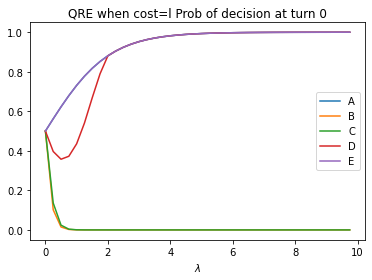

In [13]:

#Define the function whose 0 we want to find  (Turocy)
def F(p, l = 1,cost='l'): ## probability vector and value of lambda
    #with only two pure strategies use H=1 as the reference strategy
    p_t = np.transpose(p)
    p = np.exp(p)
    pp = np.transpose(p)
    
    H= p_t - np.log(1-pp) - l*(payoff(p, cost)[:,0]- payoff(p, cost)[:,1])
    res =  np.dot(np.transpose(H),H)
    return res

cons = ({'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[0]) } ,
       {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[1]) },
        {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[2]) },
        {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[3]) },
        {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[4]) },
       )


cost='l'
lSeq = np.arange(0,10,.25)
QRE = np.zeros((len(lSeq),5))
p0 = np.log([0.5,0.5,0.5,0.5,0.5])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
    
#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,0],lSeq, QRE[:,1],lSeq, QRE[:,2],lSeq, QRE[:,3],lSeq, QRE[:,4])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['A','B', 'C','D','E'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at turn 0")
plt.show()    

In [ ]:
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,0])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['A','B', 'C','D','E'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at turn 0")
plt.show()    

In [ ]:
QRE

In [14]:
res

     fun: 1.2286845894632562e-07
     jac: array([-4.26848167e+00, -1.44289831e-04, -1.44165901e-04,  3.36804717e+00,
        4.11562889e+00])
 message: 'Optimization terminated successfully'
    nfev: 140
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([-5.82927678e-05, -7.21500721e+01, -7.21500721e+01, -5.82797933e-05,
       -5.82785236e-05])

In [ ]:
#Define the function whose 0 we want to find (PolicyIteration)
l=2
cost=.5
gamma=.5
p0=np.array([.5,.5])
diff=1
while diff>.0001:
    print("--------------------------------")
    print("Difference:",diff)
    print("Guess:",p0)
    print("Expected Utility:",Utility(p0,cost,gamma))
    p1=np.exp(l*Utility(p0,cost,gamma))/np.sum(np.exp(l*Utility(p0,cost,gamma)))
    print("New Policy:",p1)
    diff=np.sum(np.abs(p0-p1))
    p0=.9*p0+.1*p1
print("QRE: ",p1)